In [135]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor

In [131]:
na_vals = ["NAN","NA"," ","Nan","nan","NaN", "NA    "] 
DF = pd.read_csv("C:/Users/candy/OneDrive/Desktop/PY4E/DATAASET/HousingData.csv", na_values=na_vals)
DF


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,NaN,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,NaN,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


PREDICTING HOUSE PRICE IN BOSTON 

In [7]:
DF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
print(DF.isna().sum())
DF.dropna(inplace=True)
print(DF.isna().sum())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


<Figure size 1000x2000 with 0 Axes>

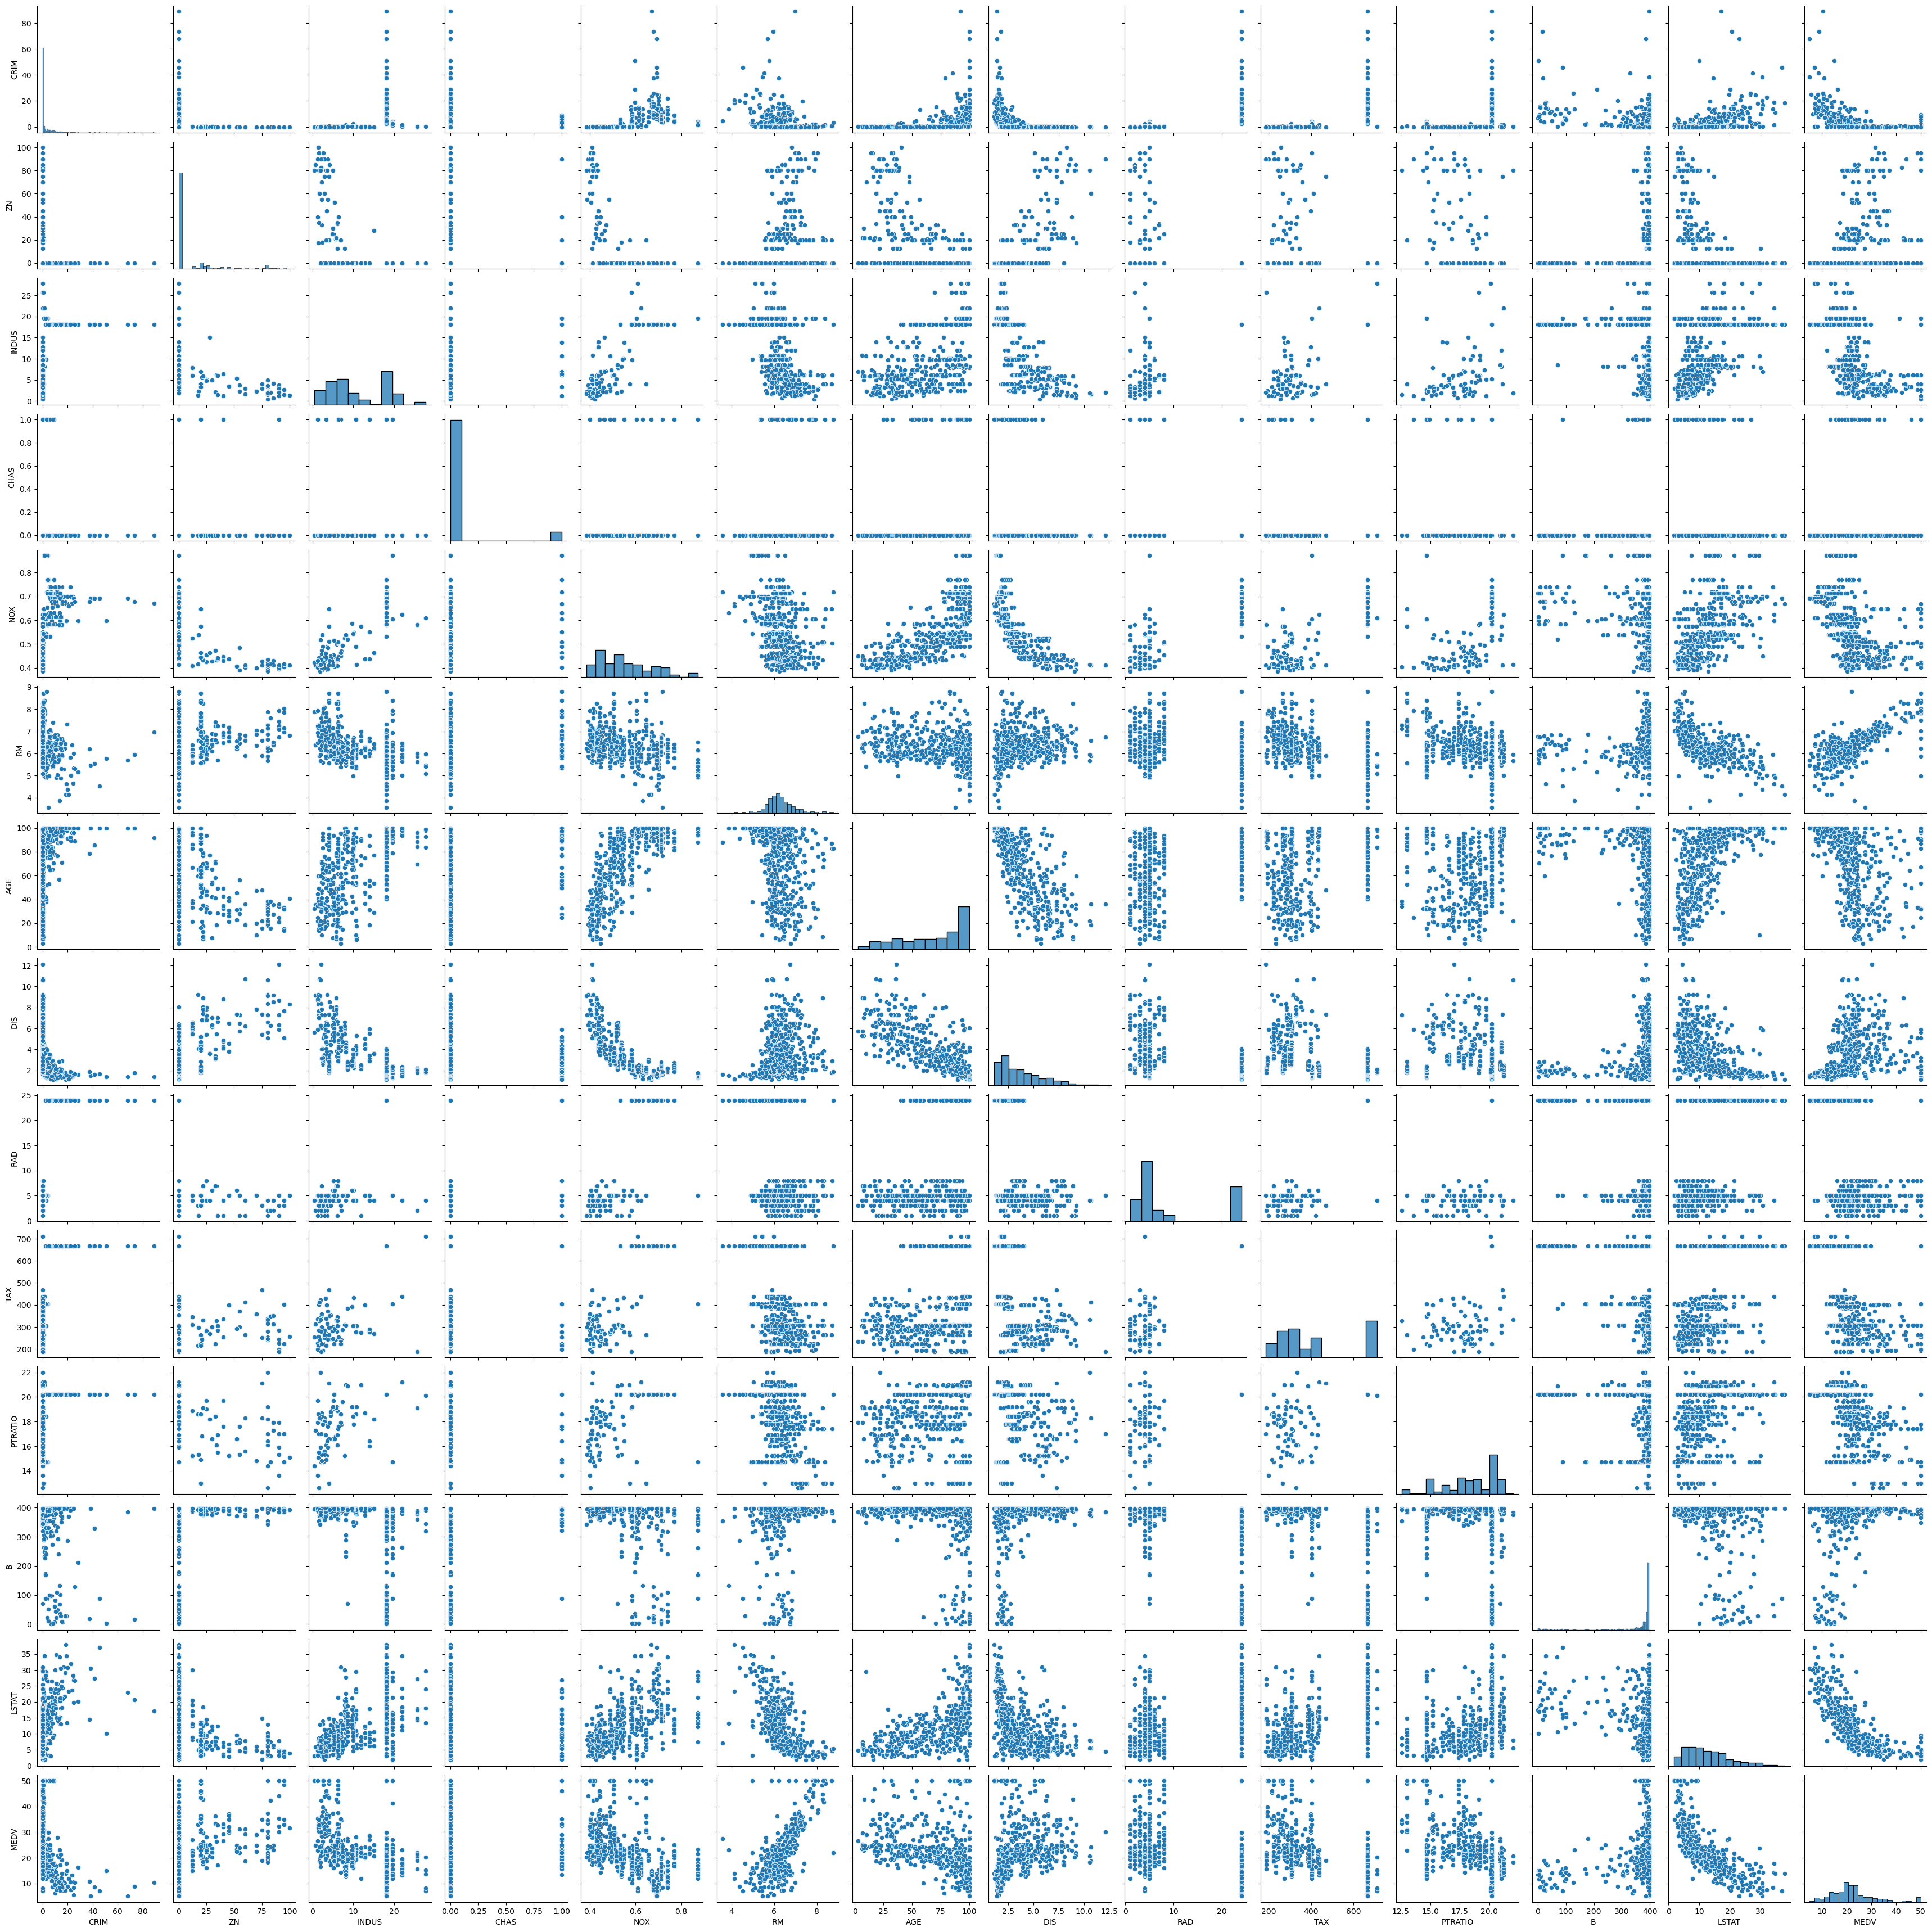

In [10]:
plt.figure(figsize=(10,20))
sns.pairplot(DF)

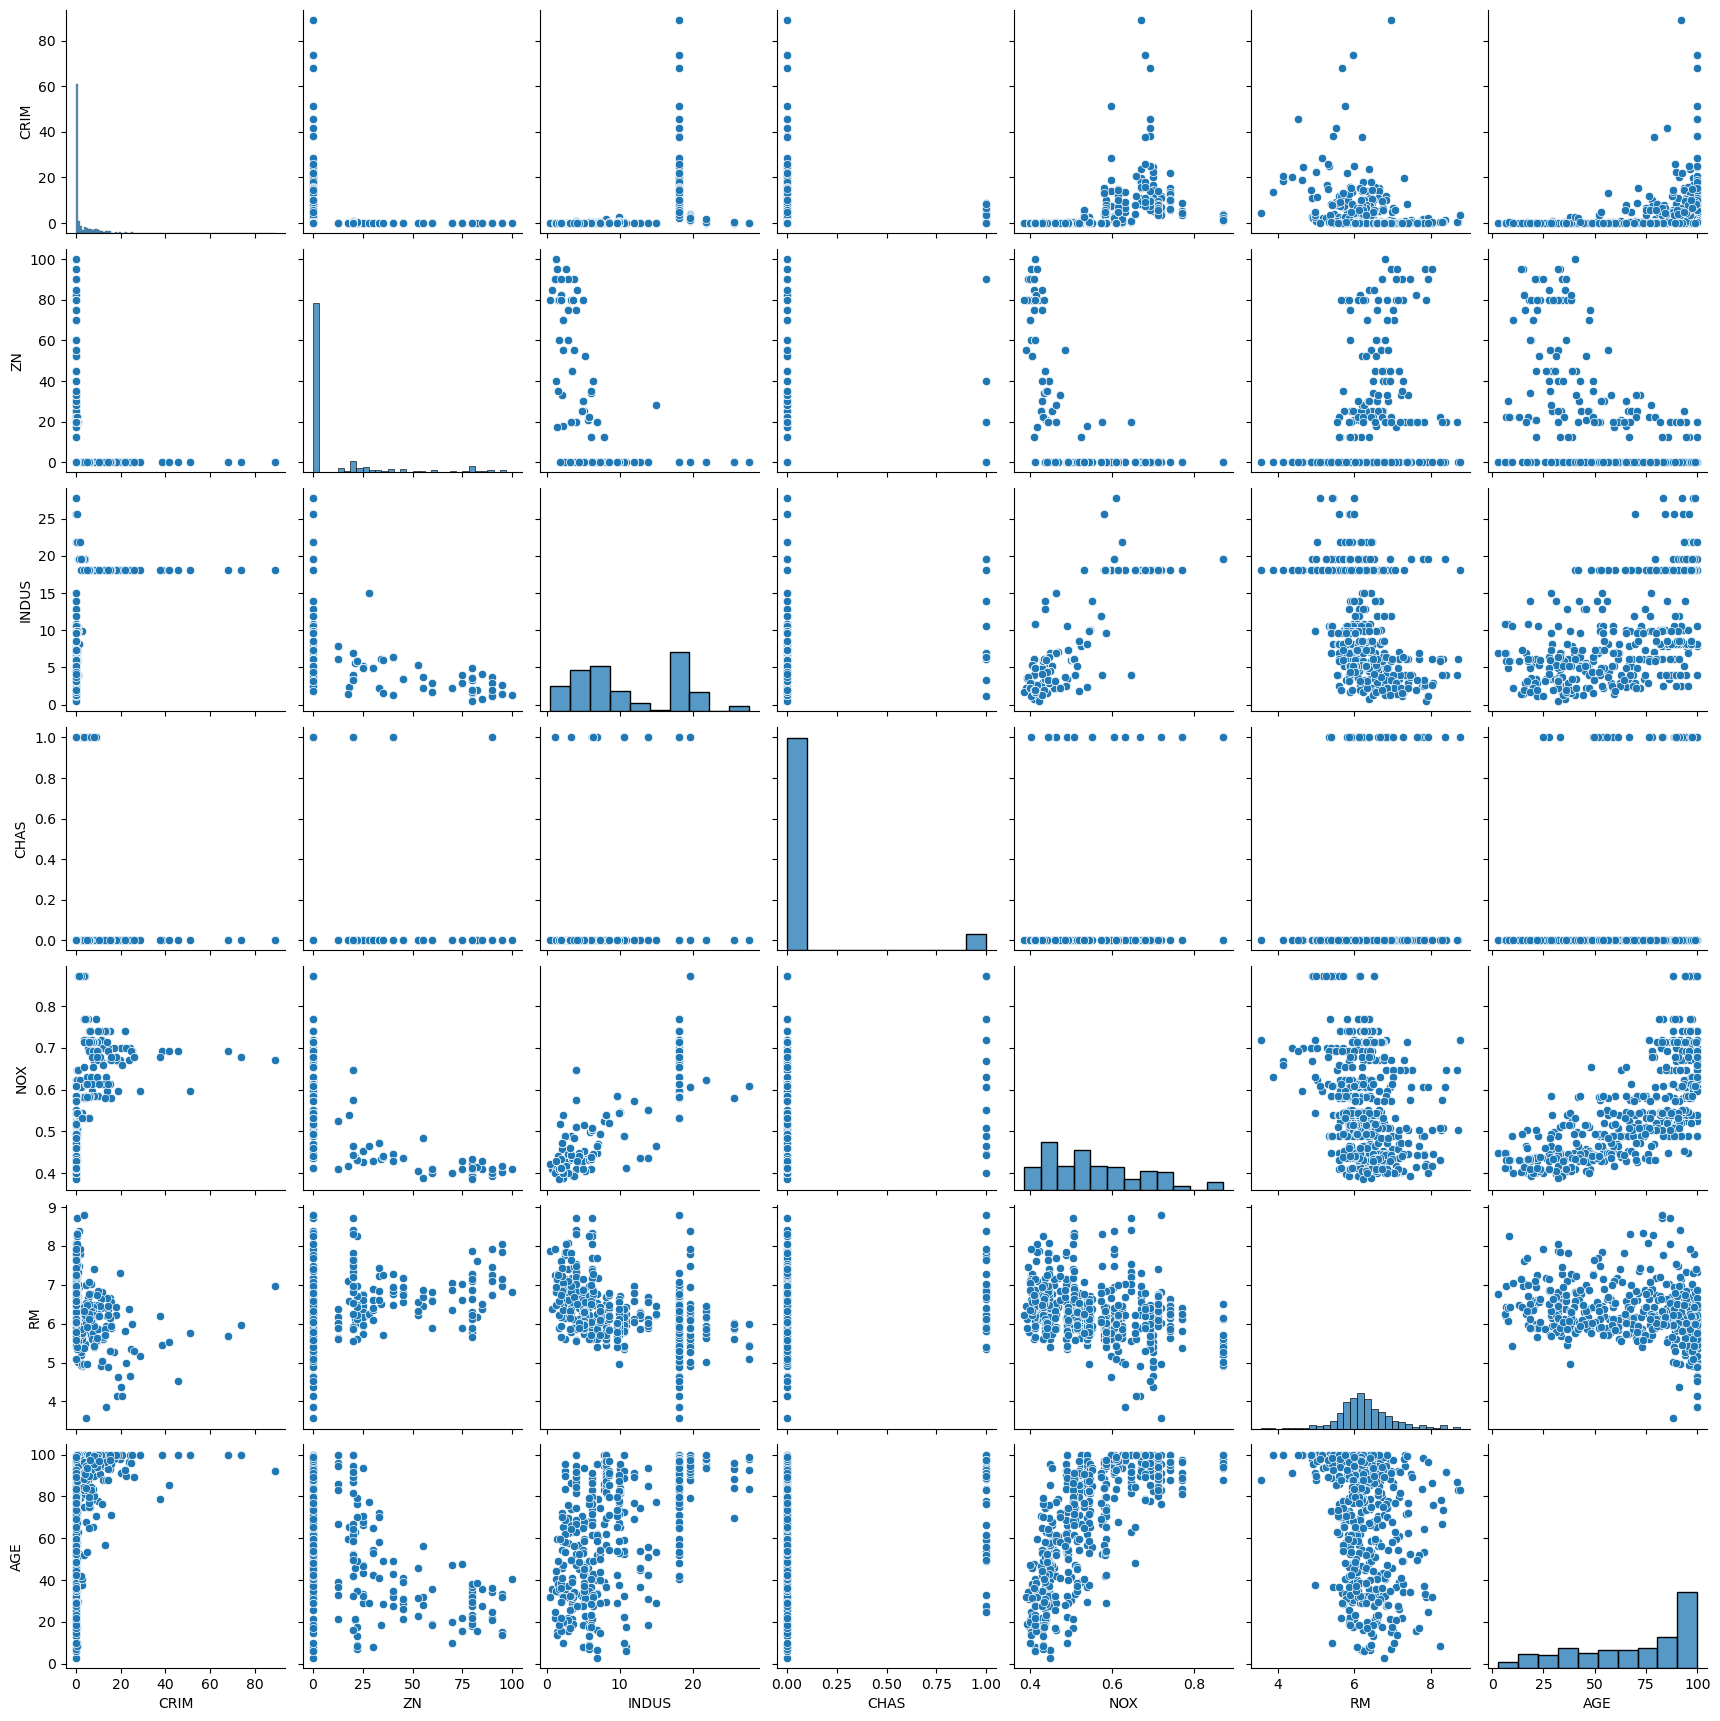

In [13]:
CF = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE"]
sns.pairplot(DF[CF])


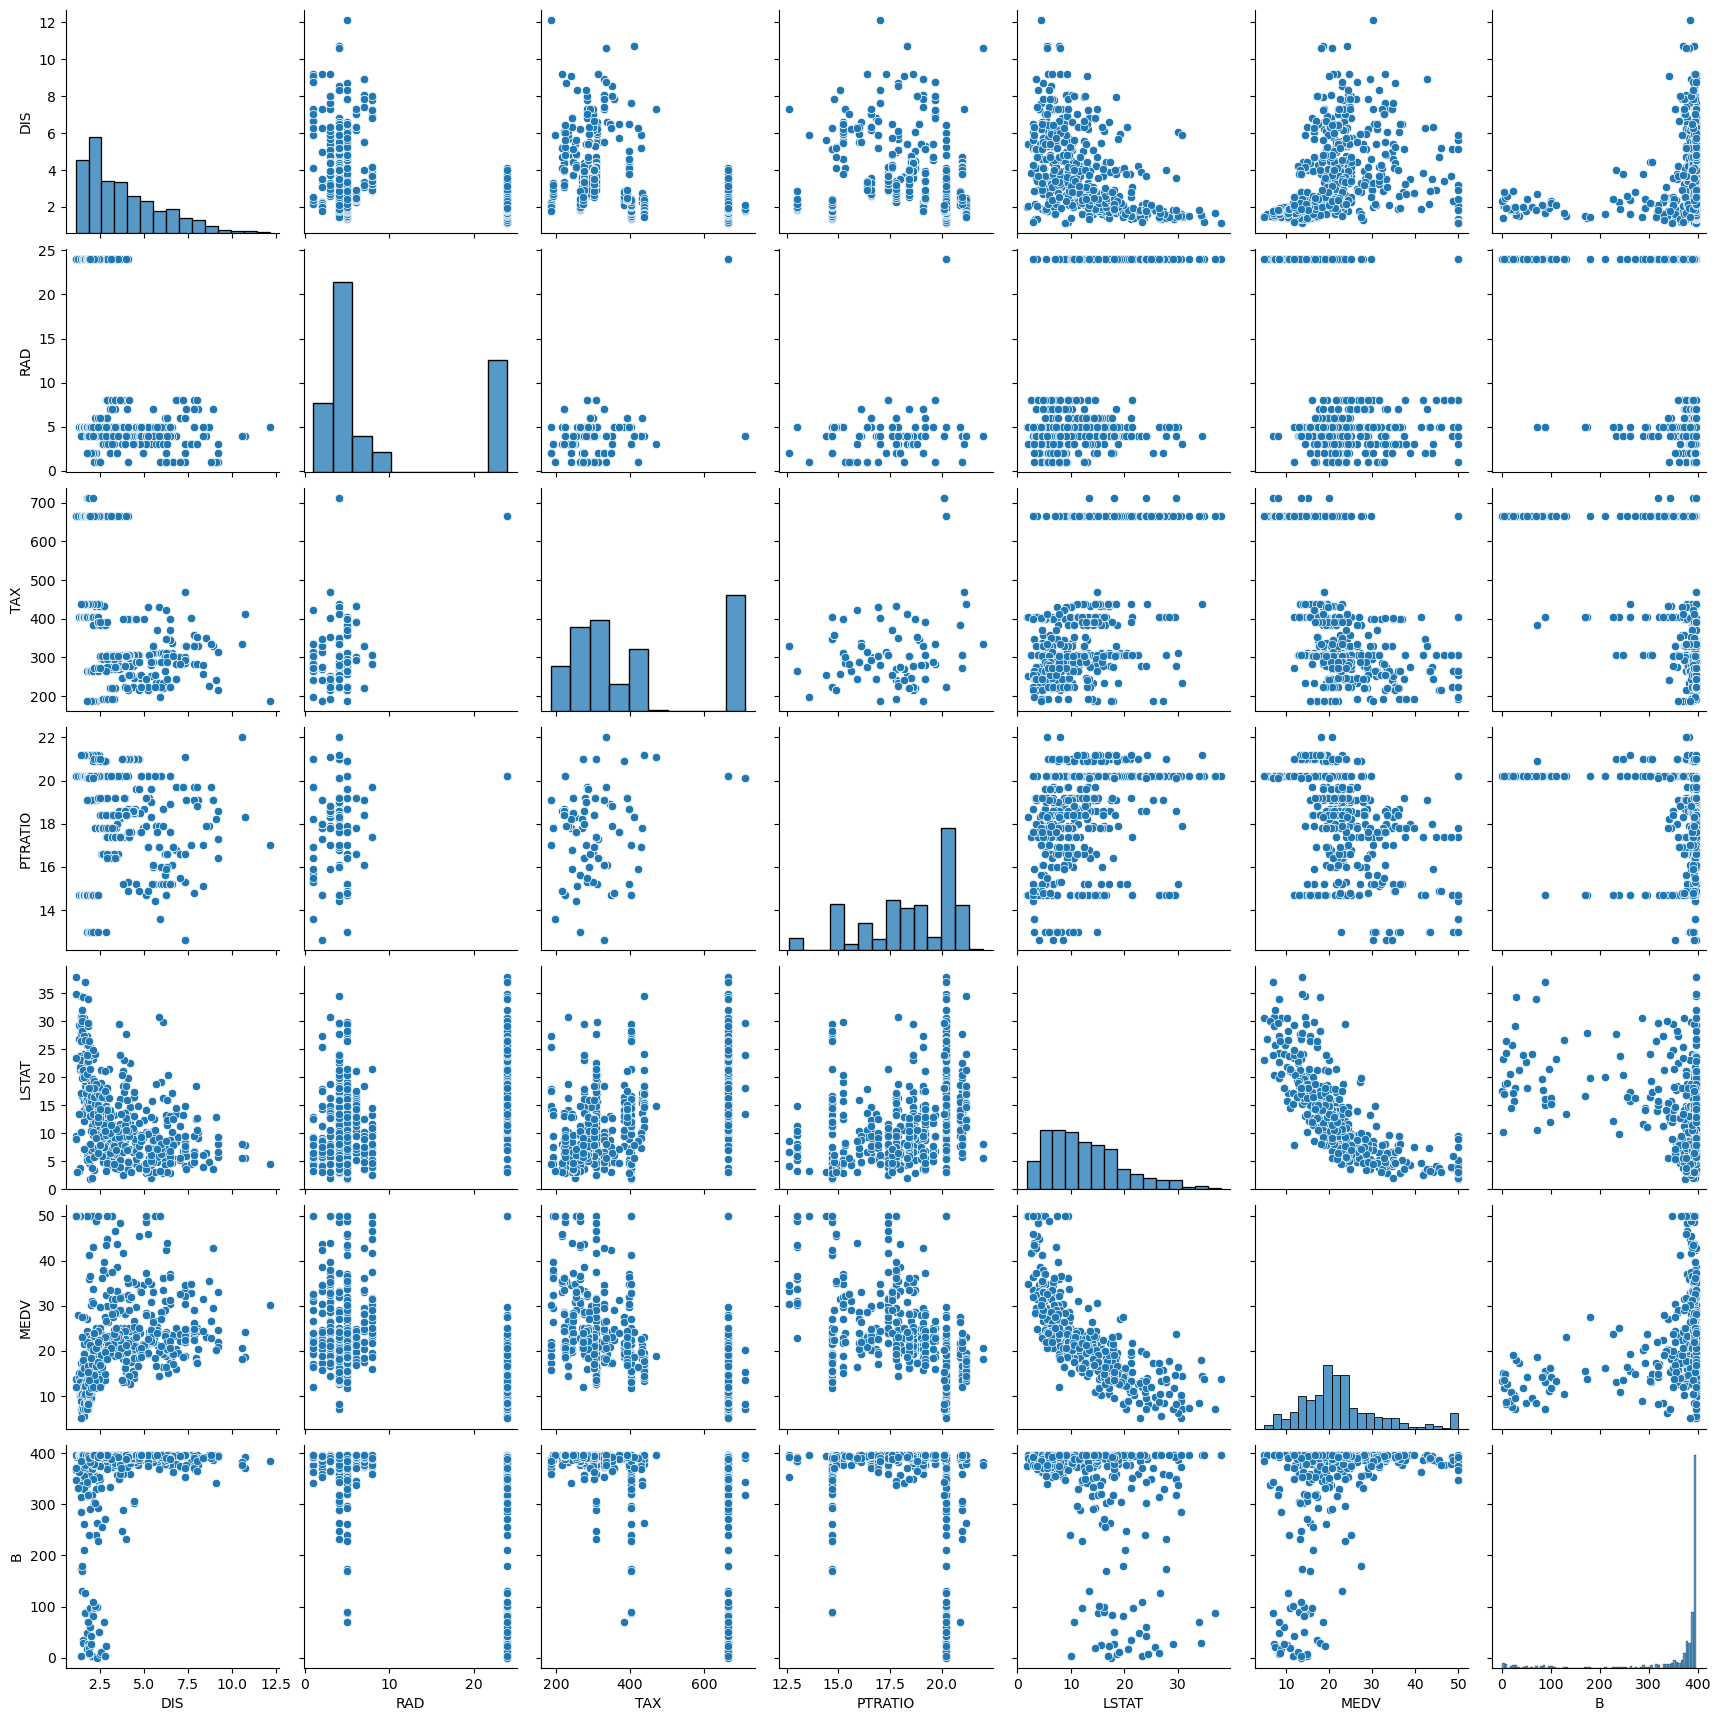

In [14]:
CF1 = ["DIS","RAD","TAX","PTRATIO","LSTAT","MEDV","B"]
sns.pairplot(DF[CF1])


In [19]:
pd.options.display.float_format= '{:,.2f}'.format
DF.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.19,0.40,-0.05,0.42,-0.22,0.35,-0.37,0.62,0.58,0.28,-0.38,0.44,-0.39
ZN,-0.19,1.00,-0.53,-0.04,-0.51,0.32,-0.56,0.66,-0.31,-0.31,-0.41,0.17,-0.41,0.37
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.73,0.39,-0.36,0.59,-0.48
CHAS,-0.05,-0.04,0.06,1.00,0.08,0.10,0.08,-0.09,0.00,-0.03,-0.11,0.05,-0.05,0.18
NOX,0.42,-0.51,0.76,0.08,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.58,-0.43
RM,-0.22,0.32,-0.39,0.10,-0.30,1.00,-0.25,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.56,0.64,0.08,0.73,-0.25,1.00,-0.74,0.46,0.51,0.27,-0.28,0.60,-0.39
DIS,-0.37,0.66,-0.71,-0.09,-0.77,0.21,-0.74,1.00,-0.49,-0.53,-0.23,0.29,-0.49,0.25
RAD,0.62,-0.31,0.60,0.00,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.48,-0.38
TAX,0.58,-0.31,0.73,-0.03,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Text(0.5, 1.0, 'BOSTON HOUSE PRICE PREDICTION')

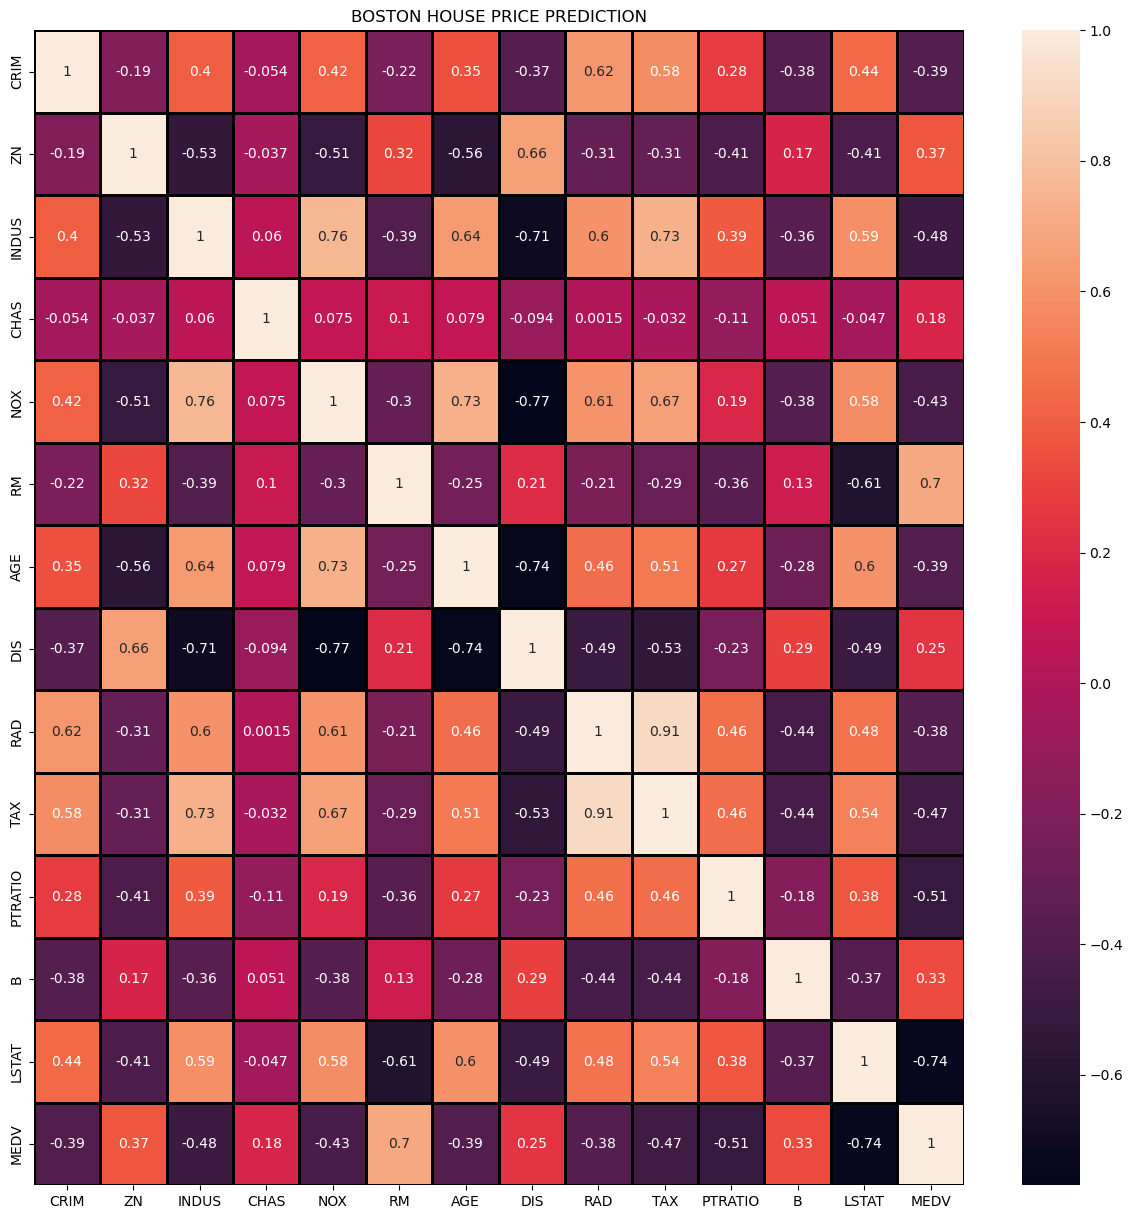

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(DF.corr(),linewidths=1,linecolor="black",annot=True)
plt.title("BOSTON HOUSE PRICE PREDICTION")

In [175]:
sns.heatmap?
pd.applymap?

Object `pd.applymap` not found.


Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

#Option 2 - Getting as a dataframe
X = df.iloc[:, :-1].values

#Option 3 - Getting as a dataframe
X = df[["X"]]

WHEN USING SKLEARN ASSIGN A 2D ARRAY TO THE SINGLE PREDITCOR VARIABLE. BY USING THE FOLLOWING ABOVE. it shouldnt be a series  either an array or as a dataframe.....

using.values gives us an array.


In [98]:
x = DF["RM"].values.reshape(-1,1)   #here we reshape to convert it to an array
x
y = DF["MEDV"].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [174]:
ols= LinearRegression()
model1 = ols.fit(x,y)
print("this is the model intercept:", model1.intercept_)
print("this is the slope of the model:",  model1.coef_)
print("this is the R2 of the model:", model1.score(x,y))  #R-SQURED....

y_pred = model1.predict(x)         #np.array([5,10,13,28]).reshape(-1,1))
# print(y_pred)
SSE_ypred = sum((y - y_pred)**2)
print("This is the Standard Error Estimate of model:", SSE_ypred)

pdf = pd.DataFrame(y_pred)
pdc = pd.DataFrame(y)

pdf_concat = pd.concat([pdf, pdc], axis=1)
pdf_concat.rename(columns={0:"predicted_house price"}, inplace=True)
pdf_concat


this is the model intercept: -34.670620776438554
this is the slope of the model: [9.10210898]
this is the R2 of the model: 0.48352545599133423
This is the Standard Error Estimate of model: 22061.8791962118


,predicted_house price,predicted_house price
0,25.18,24.00
1,23.77,21.60
2,30.73,34.70
3,29.03,33.40
4,30.38,36.20
...,...,...
501,25.34,22.40
502,21.03,20.60
503,28.83,23.90
504,27.17,22.00


Text(0.5, 1.0, 'Boston house prediction with room feature')

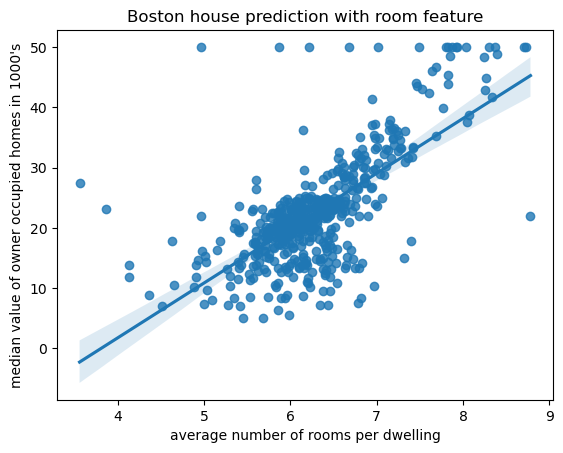

In [123]:
sns.regplot(x="RM",y="MEDV",data = DF,x_ci="ci")
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("median value of owner occupied homes in 1000's")
plt.title("Boston house prediction with room feature")


Text(0.5, 1.0, 'Boston house prediction with room feature')

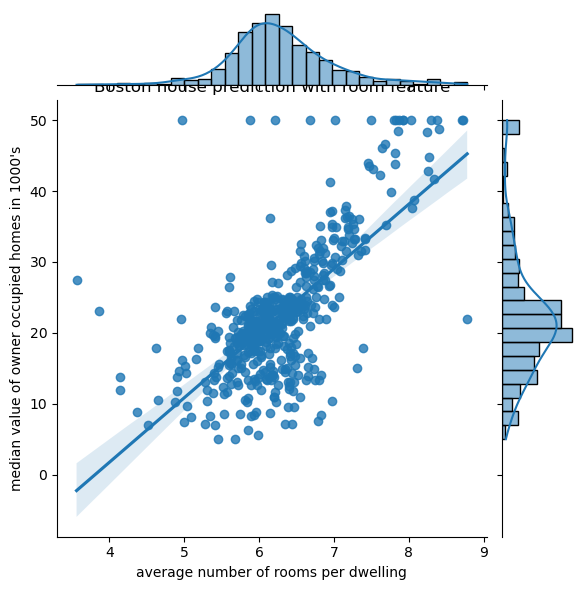

In [119]:

sns.jointplot(x="RM",y="MEDV",data = DF,kind="reg")
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("median value of owner occupied homes in 1000's")
plt.title("Boston house prediction with room feature")




In [176]:
model1.predict(np.array([3,4,5,6,7,8,9]).reshape(-1,1))

array([-7.36429383,  1.73781515, 10.83992413, 19.94203311, 29.04414209,
       38.14625107, 47.24836005])

In [132]:
x2= DF["LSTAT"].values.reshape(-1,1)
x2
y2 = DF["MEDV"].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [  nan],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [  nan],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [136]:
model2= HistGradientBoostingRegressor()
model2.fit(x2,y2)
# print(model2.intercept_)
# print(model2.coef_)
print(model2.score(x2,y2)) #R-SQURED....

0.7195463263074929


In [142]:
model2.predict(np.array([5]).reshape(-1,1))

array([30.12626914])

Text(0.5, 1.0, 'Boston house prediction with room feature')

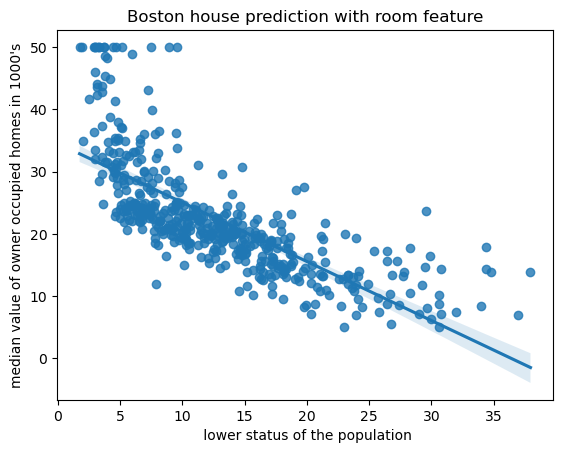

In [141]:
sns.regplot(x="LSTAT",y="MEDV",data = DF,x_ci="ci")
plt.xlabel(" lower status of the population")
plt.ylabel("median value of owner occupied homes in 1000's")
plt.title("Boston house prediction with room feature")


In [181]:
import requests